In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("dark_background")

In [2]:
data = pd.read_csv("/home/code/python/datascience/data/Financials.csv")

In [3]:
data.head(n=5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [4]:
data.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [5]:
data.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" ", "_")
print(data.columns)

Index(['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold',
       'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month_Number', 'Month_Name',
       'Year'],
      dtype='object')


In [7]:
print(data.dtypes)

Segment                object
Country                object
Product                object
Discount_Band          object
Units_Sold             object
Manufacturing_Price    object
Sale_Price             object
Gross_Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month_Number            int64
Month_Name             object
Year                    int64
dtype: object


In [8]:
for col in data.columns:
    if data.dtypes[col] != "object":
        continue
    data[col] = data[col].str.strip()

In [9]:
for col in data.columns:
    print(f'Column {col}:')
    print(data[col].value_counts())

Column Segment:
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: Segment, dtype: int64
Column Country:
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: Country, dtype: int64
Column Product:
Paseo        202
Velo         109
VTT          109
Amarilla      94
Carretera     93
Montana       93
Name: Product, dtype: int64
Column Discount_Band:
High      245
Medium    242
Low       160
None       53
Name: Discount_Band, dtype: int64
Column Units_Sold:
$727.00      5
$2,844.00    4
$1,916.00    4
$663.00      4
$1,743.00    4
            ..
$2,723.00    1
$1,460.00    1
$980.00      1
$887.00      1
$1,806.00    1
Name: Units_Sold, Length: 510, dtype: int64
Column Manufacturing_Price:
$10.00     202
$120.00    109
$250.00    109
$260.00     94
$3.00       93
$5.00       93
Name: Manufacturing_Price, d

In [10]:
data["Units_Sold"] = data.Units_Sold.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["Manufacturing_Price"] = data.Manufacturing_Price.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["Sale_Price"] = data.Sale_Price.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["Gross_Sales"] = data.Gross_Sales.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["Discounts"] = data.Discounts.str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.replace("-", "0.00", regex=False)
data["Sales"] = data.Sales.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["COGS"] =  data.COGS.str.replace("$", "", regex=False).str.replace(",", "", regex=False)
data["Profit"] =  data.Profit.str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.replace("-", "0.00", regex=False).str.replace("(", "-", regex=False).str.replace(")", "", regex=False)

In [11]:
for col in data.columns:
    print(f'Column {col}:')
    print(data[col].value_counts())

Column Segment:
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: Segment, dtype: int64
Column Country:
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: Country, dtype: int64
Column Product:
Paseo        202
Velo         109
VTT          109
Amarilla      94
Carretera     93
Montana       93
Name: Product, dtype: int64
Column Discount_Band:
High      245
Medium    242
Low       160
None       53
Name: Discount_Band, dtype: int64
Column Units_Sold:
727.00     5
2844.00    4
1916.00    4
663.00     4
1743.00    4
          ..
2723.00    1
1460.00    1
980.00     1
887.00     1
1806.00    1
Name: Units_Sold, Length: 510, dtype: int64
Column Manufacturing_Price:
10.00     202
120.00    109
250.00    109
260.00     94
3.00       93
5.00       93
Name: Manufacturing_Price, dtype: int64
Column Sale_Pric

In [12]:
data.Units_Sold = data.Units_Sold.astype("float32")
data.Manufacturing_Price = data.Manufacturing_Price.astype("float32")
data.Sale_Price = data.Sale_Price.astype("float32")
data.Gross_Sales = data.Gross_Sales.astype("float32")
data.Discounts = data.Discounts.astype("float32")
data.Sales = data.Sales.astype("float32")
data.COGS = data.COGS.astype("float32")
data.Profit = data.Profit.astype("float32")

In [13]:
print(data.dtypes)

Segment                 object
Country                 object
Product                 object
Discount_Band           object
Units_Sold             float32
Manufacturing_Price    float32
Sale_Price             float32
Gross_Sales            float32
Discounts              float32
Sales                  float32
COGS                   float32
Profit                 float32
Date                    object
Month_Number             int64
Month_Name              object
Year                     int64
dtype: object


In [14]:
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")

In [15]:
print(data.dtypes)

Segment                        object
Country                        object
Product                        object
Discount_Band                  object
Units_Sold                    float32
Manufacturing_Price           float32
Sale_Price                    float32
Gross_Sales                   float32
Discounts                     float32
Sales                         float32
COGS                          float32
Profit                        float32
Date                   datetime64[ns]
Month_Number                    int64
Month_Name                     object
Year                            int64
dtype: object


In [16]:
print(data.head())

      Segment  Country    Product Discount_Band  Units_Sold  \
0  Government   Canada  Carretera          None      1618.5   
1  Government  Germany  Carretera          None      1321.0   
2   Midmarket   France  Carretera          None      2178.0   
3   Midmarket  Germany  Carretera          None       888.0   
4   Midmarket   Mexico  Carretera          None      2470.0   

   Manufacturing_Price  Sale_Price  Gross_Sales  Discounts    Sales     COGS  \
0                  3.0        20.0      32370.0        0.0  32370.0  16185.0   
1                  3.0        20.0      26420.0        0.0  26420.0  13210.0   
2                  3.0        15.0      32670.0        0.0  32670.0  21780.0   
3                  3.0        15.0      13320.0        0.0  13320.0   8880.0   
4                  3.0        15.0      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month_Number Month_Name  Year  
0  16185.0 2014-01-01             1    January  2014  
1  13210.0 2014-01-01         

In [17]:
print(data.Date.unique())

['2014-01-01T00:00:00.000000000' '2014-06-01T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2014-07-01T00:00:00.000000000' '2014-08-01T00:00:00.000000000'
 '2014-09-01T00:00:00.000000000' '2013-10-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2013-09-01T00:00:00.000000000'
 '2014-10-01T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2013-12-01T00:00:00.000000000' '2014-04-01T00:00:00.000000000'
 '2014-05-01T00:00:00.000000000' '2014-11-01T00:00:00.000000000']


In [18]:
result = data.groupby("Product")["Profit"].sum().to_frame()
result = result.reset_index()
print(result)

     Product       Profit
0   Amarilla  2814104.000
1  Carretera  1826804.875
2    Montana  2114755.000
3      Paseo  4797438.000
4        VTT  3034608.000
5       Velo  2305992.500


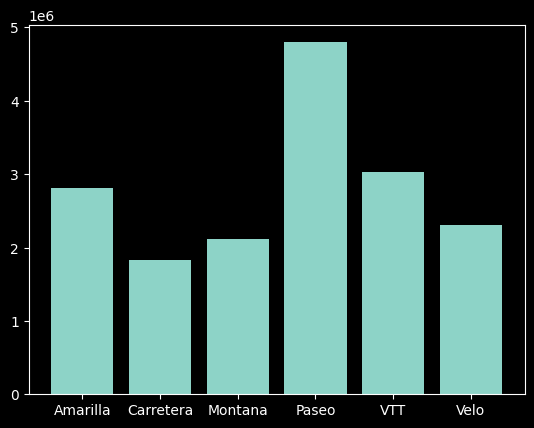

In [19]:
plt.bar(result["Product"], result["Profit"])
plt.show()

In [20]:
result = data.groupby(["Product", "Year"])["Profit"].sum().to_frame()
result = result.reset_index()
#print(result)

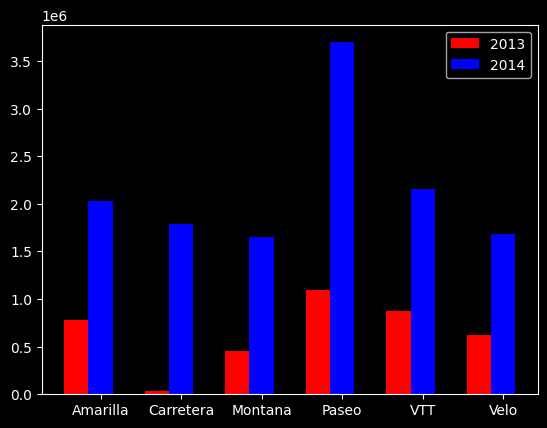

In [22]:
ind = np.arange(len(result["Product"].unique()))
w = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind, result["Profit"].loc[result["Year"] == 2013], w, label = "2013", color="red")
ax.bar(ind+w, result["Profit"].loc[result["Year"] == 2014], w, label = "2014", color="blue")

ax.set_xticks(ind+w)
ax.set_xticklabels(result["Product"].unique())
ax.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax1, ax2 = fig.add